# Unsupervised Machine Learning
Previously, we have seen Supervised Machin Learning Algorithms which deals with labeled training data such as Classification and Regresion. Now, lets dive into Unsupervised Machine Learning which deals with unlabeled training data. <br>
__In Unsupervised Machine Learning, the model works on its own to discover patterns and information that was previously undetected.__

# K-Means Clustering Algorithm
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on. <br>
### It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each data belongs only one group that has similar properties.
**Goal:** It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.<br>


### Steps:
    Step 1: Choose the number of clusters k. 
    Step 2: Select k random points from the data as centroids.
    Step 3: Assign all the points to the closest cluster centroid. 
    Step 4: Calculate the mean of each cluster as new centroid.
    Step 5: Recompute the centroids of newly formed clusters. 
    Step 6: Repeat steps 4 and 5 until the best clusters are formed.

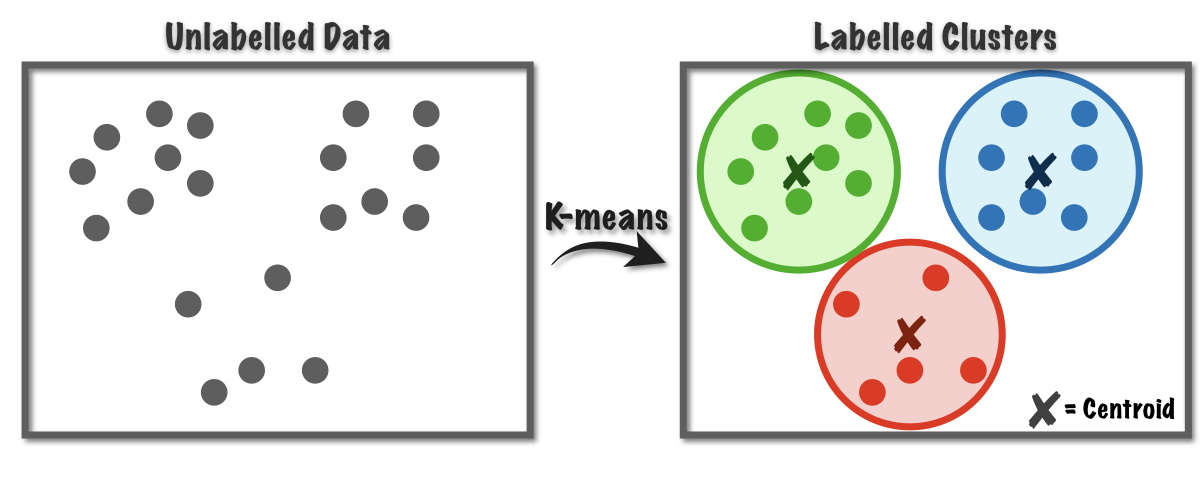

## Import Modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

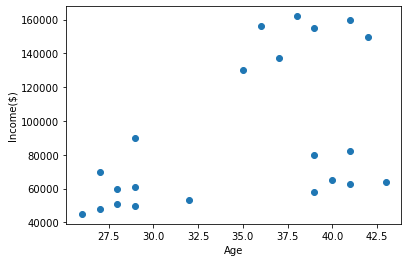

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
# we can find that the dataset can be categorized under 3 clusters

## Model Training

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [5]:
# training and prediction
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

# 'fit_predict' function fits the model to dataset and also perform prediction.
# syntax: model.fit_predict(df[[feature,targets]]) (or) model.fit_predict(df[[feature]],df[targets])
# (or) we can implement fit and predict on subsequent steps asusual.

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
#concatenate
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
# cluster centroids
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

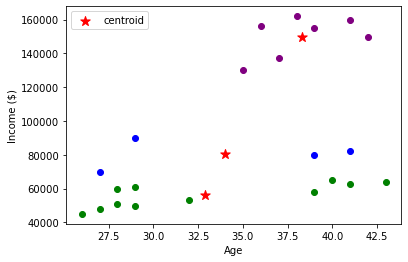

In [8]:
# Visualizing predicted classification

#create 3 different clusters (each describes a category of cluster)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

#plotting
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='purple')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',s=100,label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#we can find that there is inaccuracy in prediction as the datapoints are clustered worngly.

## PreProcessing using MinMaxScaler
MinMaxScaler - Transform features by scaling each feature to a given range. <br>
This estimator scales and translates each feature individually such that it is in the given range on the training set, 
by default (between zero and one).<br>
The transformation is given by:<br>
 **X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))**<br>
 where min, max = feature_range.<br>

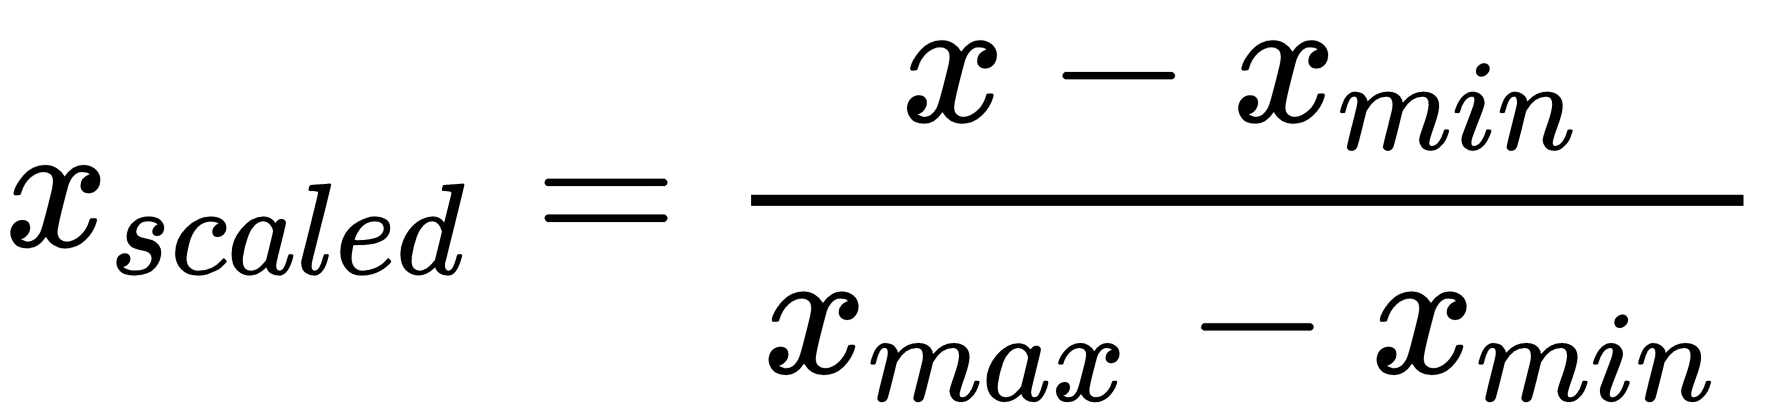

In [9]:
# MinMaxScaler is used Transform features by scaling each feature to a given range.
# ie. used to convert all feature data between a specific range

# here, converts all the data in 'Age and Income' eatures between the range 0 and 1
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


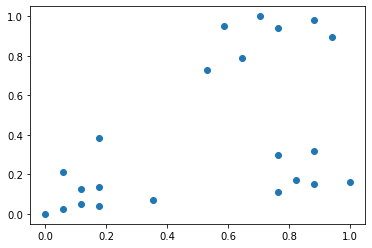

In [11]:
plt.scatter(df.Age,df['Income($)'])

In [12]:
# perform taining and prediction for scallend data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [14]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

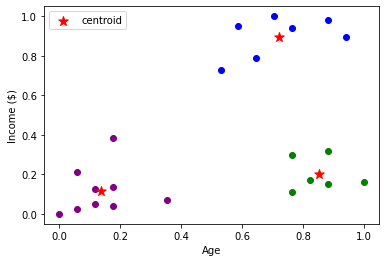

In [15]:
# Visualizing predicted classification

#create 3 different clusters (each describes a category of cluster)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

#plotting
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='purple')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',s=100,label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#we can find that there is inaccuracy in prediction as the datapoints are clustered worngly.

## Elbow Plot (To determine best K value)

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

# knn.inertia_ provides the Sum of Squared Error(SSE) for each cluster and computes mean for entire classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


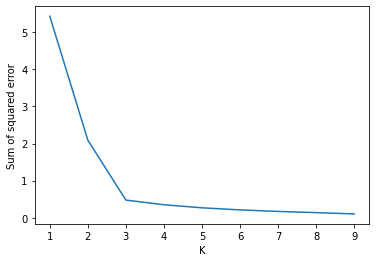

In [17]:
# Elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### After k=3, the plot attains stable state and remains constant. So, it is the best k value.